In [1]:
# code by Yashasvi (b21076).....

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("zomato_reviews.csv")
df

,Unnamed: 0,rating,review
0,0,5,nice
1,1,5,"best biryani , so supportive staff of outlet ,..."
2,2,4,delivery boy was very decent and supportive.👌👍
3,3,1,"worst biryani i have tasted in my life, half o..."
4,4,5,all food is good and tasty . will order again ...
...,...,...,...
5474,5474,5,complain
5475,5475,5,it took 1 hour to assign valvet and thn prepar...
5476,5476,5,"took for an hour to prepare 3 khawsa, which in..."
5477,5477,1,"very very late, littrally did time pass and it..."


In [3]:
df.shape

(5479, 3)

In [4]:
df.columns

Index(['Unnamed: 0', 'rating', 'review'], dtype='object')

In [5]:
# type(df)

# Cleaning part

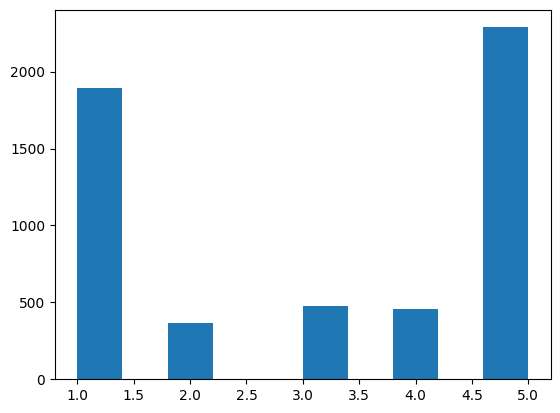

In [7]:
plt.hist(df['rating'])  ## histogram plot of ratings
plt.show()

In [10]:
df.isnull().sum()

,0
Unnamed: 0,0
rating,0
review,1


In [11]:
df = df.fillna('')

In [12]:
df.isnull().sum()

,0
Unnamed: 0,0
rating,0
review,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5479 entries, 0 to 5478
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5479 non-null   int64 
 1   rating      5479 non-null   int64 
 2   review      5479 non-null   object
dtypes: int64(2), object(1)
memory usage: 128.5+ KB


In [14]:
df.dtypes


,0
Unnamed: 0,int64
rating,int64
review,object


In [18]:
df.duplicated().sum()

0

In [19]:
df['rating'].describe()

,rating
count,5479.000000
mean,3.161343
std,1.782197
min,1.000000
25%,1.000000
50%,4.000000
75%,5.000000
max,5.000000


# Visualization

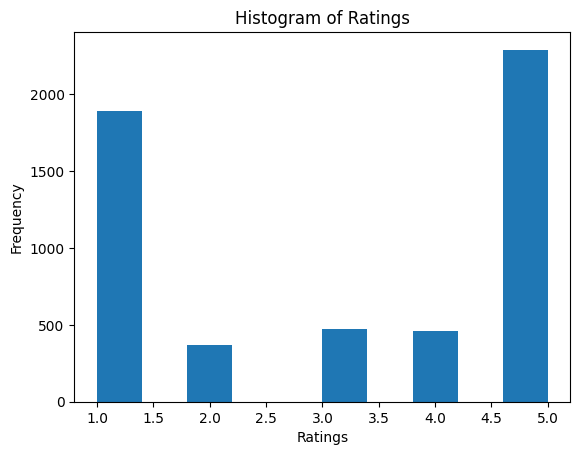

In [38]:
plt.hist(df['rating'])
plt.title('Histogram of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

<ipython-input-36-8b0ba353a872>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rating'])


<Axes: xlabel='rating', ylabel='Density'>

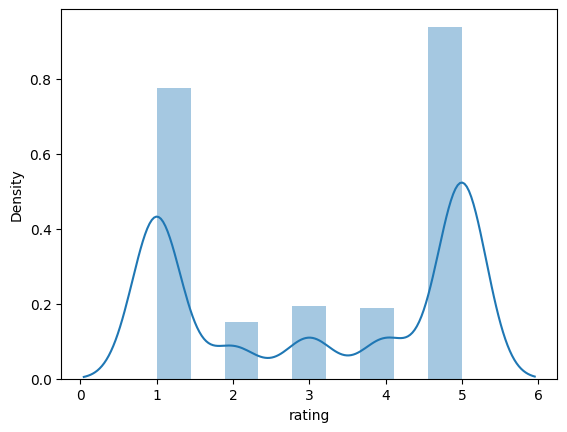

In [36]:
sns.distplot(df['rating'])

<Axes: >

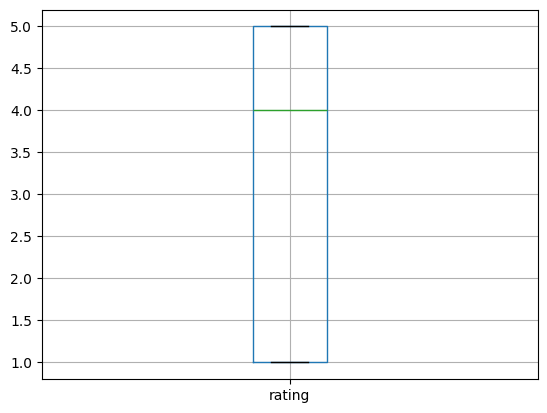

In [26]:
fig = df.boxplot(column="rating")
fig

# # Boxplot for ratings
# sns.boxplot(x=df['rating'])
# plt.title('Boxplot of Ratings')
# plt.show()

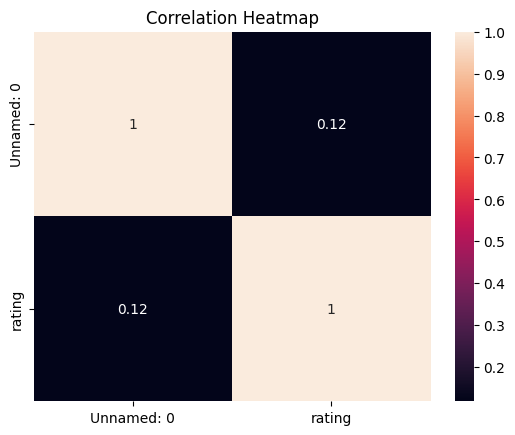

In [33]:
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(),annot=True)
plt.title('Correlation Heatmap')            ## heatmap plot of null values
plt.show()

<ipython-input-35-acb492a645b7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df1.index, x=df1.values, palette="viridis")
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128153 (\N{BLUE HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129535 (\N{NAZAR AMULET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


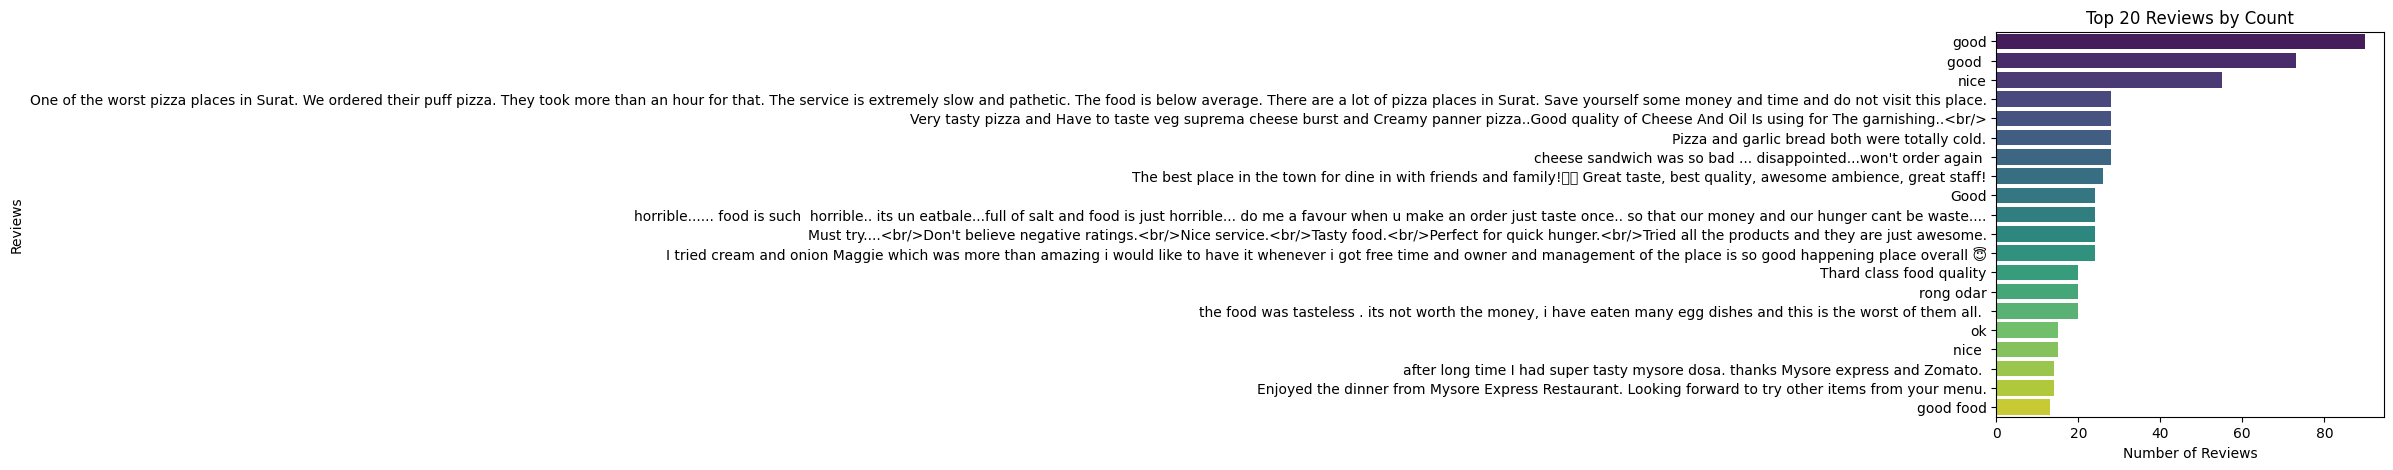

In [35]:
df1 = df['review'].value_counts()[:20]
plt.figure(figsize=(5, 5))
sns.barplot(y=df1.index, x=df1.values, palette="viridis")
plt.title('Top 20 Reviews by Count')
plt.xlabel('Number of Reviews')
plt.ylabel('Reviews')
plt.show()

In [42]:
df['review'].value_counts()

,count
review,
good,90
good,73
nice,55
One of the worst pizza places in Surat. We ordered their puff pizza. They took more than an hour for that. The service is extremely slow and pathetic. The food is below average. There are a lot of pizza places in Surat. Save yourself some money and time and do not visit this place.,28
Very tasty pizza and Have to taste veg suprema cheese burst and Creamy panner pizza..Good quality of Cheese And Oil Is using for The garnishing..<br/>,28
...,...
Worst experience ever. Too small portion size with no taste at all. On top of it Zomato delivery partner don’t use the warming container to keep food safe and warm. Orders take longer than expected.,1
quantity was less than last time but it's tasty as always I order it very oftenly,1
3rd class food quality and taste.. <br/>couldnt eat anything to be frank. worst egg items i have ever tasted.,1


In [46]:
ratings = df['rating'].value_counts()
ratings

,count
rating,
5,2288
1,1891
3,474
4,458
2,368


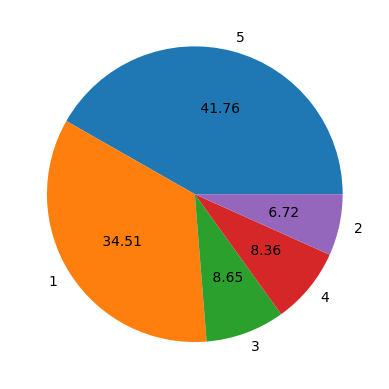

In [47]:
plt.pie(df['rating'].value_counts(),labels=['5','1','3','4','2'],autopct="%0 .2f")
plt.show()

# DATA PREPROCESSING

In [48]:
!pip install nltk

In [56]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

# Download the 'punkt_tab' resource
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,num_characters,num_words,num_sentences
count,5479.000000,5479.000000,5479.000000
mean,62.667093,13.118452,1.318306
std,71.902157,15.854924,0.933620
min,0.000000,0.000000,0.000000
25%,15.000000,3.000000,1.000000
50%,38.000000,8.000000,1.000000
75%,86.000000,18.000000,1.000000
max,788.000000,181.000000,15.000000


In [57]:
df['num_characters'] = df['review'].apply(len)
df['num_words']=df['review'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentences']=df['review'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,Unnamed: 0,rating,review,num_characters,num_words,num_sentences
0,0,5,nice,4,1,1
1,1,5,"best biryani , so supportive staff of outlet ,...",104,21,2
2,2,4,delivery boy was very decent and supportive.👌👍,46,7,1
3,3,1,"worst biryani i have tasted in my life, half o...",75,17,1
4,4,5,all food is good and tasty . will order again ...,91,20,2


In [58]:
df[['num_characters','num_words',"num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5479.000000,5479.000000,5479.000000
mean,62.667093,13.118452,1.318306
std,71.902157,15.854924,0.933620
min,0.000000,0.000000,0.000000
25%,15.000000,3.000000,1.000000
50%,38.000000,8.000000,1.000000
75%,86.000000,18.000000,1.000000
max,788.000000,181.000000,15.000000


In [74]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Text preprocessing for topic modeling
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['review'])

# LDA Model
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(X)

# Display Topics
print("\nTopics Identified:")
terms = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"\nTopic {idx + 1}:")
    print(", ".join([terms[i] for i in topic.argsort()[-10:]]))



Topics Identified:

Topic 1:
ordered, restaurant, money, zomato, time, food, pizza, delivery, order, bad

Topic 2:
order, horrible, amazing, try, just, like, quantity, food, taste, br

Topic 3:
tasty, worst, cheese, br, best, quality, nice, taste, food, good


In [59]:
from wordcloud import WordCloud,ImageColorGenerator,STOPWORDS

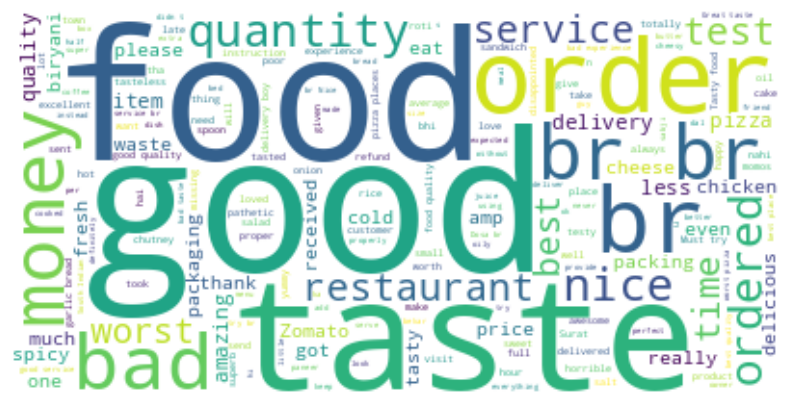

In [60]:
text =" ".join(i for i in df['review'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color = "white").generate(text)
plt.figure(figsize=(14,5))
plt.imshow(wordcloud,interpolation = "bilinear")
plt.axis("off")
plt.show()

# MODEL BUILDING

In [61]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [62]:
import nltk
nltk.download('vader_lexicon')
# Initialize the sentiment analyzer
senti_ana = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [63]:
df["Sentiment"] = df["review"].apply(lambda x: senti_ana.polarity_scores(x))
df["Positive"] = df["Sentiment"].apply(lambda x: x["pos"])
df["Negative"] =df["Sentiment"].apply(lambda x: x["neg"])
df["Neutral"] = df["Sentiment"].apply(lambda x: x["neu"])
df.head()

,Unnamed: 0,rating,review,num_characters,num_words,num_sentences,Sentiment,Positive,Negative,Neutral
0,0,5,nice,4,1,1,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",1.000,0.00,0.000
1,1,5,"best biryani , so supportive staff of outlet ,...",104,21,2,"{'neg': 0.0, 'neu': 0.691, 'pos': 0.309, 'comp...",0.309,0.00,0.691
2,2,4,delivery boy was very decent and supportive.👌👍,46,7,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.00,1.000
3,3,1,"worst biryani i have tasted in my life, half o...",75,17,1,"{'neg': 0.24, 'neu': 0.76, 'pos': 0.0, 'compou...",0.000,0.24,0.760
4,4,5,all food is good and tasty . will order again ...,91,20,2,"{'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'comp...",0.153,0.00,0.847


In [70]:
# Summarize sentiment scores
positive_score = df["Positive"].sum()
negative_score = df["Negative"].sum()
neutral_score = df["Neutral"].sum()

# Determine overall sentiment
def sentiment_score(positive, negative, neutral):
    if positive > negative and positive > neutral:
        return "Positive"
    elif negative > positive and negative > neutral:
        return "Negative"
    else:
        return "Neutral"

overall_sentiment = sentiment_score(positive_score, negative_score, neutral_score)


In [71]:
print(f"\nSentiment Analysis Results:")
print(f"Positive Score: {positive_score}")
print(f"Negative Score: {negative_score}")
print(f"Neutral Score: {neutral_score}")
print(f"Overall Sentiment: {overall_sentiment}")


Sentiment Analysis Results:
Positive Score: 1227.423
Negative Score: 618.6800000000001
Neutral Score: 3607.916
Overall Sentiment: Neutral
